# **Homework3**

Kangjing fan

### 1. Autoencoder

In [0]:
from keras.layers import Dropout,Flatten,Embedding,LSTM,Conv1D,AveragePooling1D,BatchNormalization
from keras.models import Model, Sequential
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, GlobalMaxPooling1D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [67]:
autoenc = Sequential()
#encoding

autoenc.add(Conv2D(16, (3,3), activation= 'relu', padding='same', input_shape = (28,28,1)))
autoenc.add(MaxPooling2D((2,2), padding ='same'))
autoenc.add(Conv2D(8, (3,3), activation= 'relu', padding='same'))
autoenc.add(MaxPooling2D((2,2), padding = 'same'))
autoenc.add(Conv2D(8, (3,3), activation= 'relu', padding='same'))
autoenc.add(MaxPooling2D((2,2), padding = 'same'))

# decoding
autoenc.add(Conv2D(8, (3,3), activation= 'relu', padding='same'))
autoenc.add(UpSampling2D((2,2)))
autoenc.add(Conv2D(8, (3,3), activation= 'relu', padding='same'))
autoenc.add(UpSampling2D((2,2)))
autoenc.add(Conv2D(16, (3,3), activation= 'relu'))
autoenc.add(UpSampling2D((2,2)))
autoenc.add(Conv2D(1, (3,3), activation= 'sigmoid', padding='same'))

autoenc.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 8)        

In [0]:
autoenc.compile(optimizer='adadelta', loss='binary_crossentropy')

In [22]:
autoenc.fit(x_train, x_train, epochs=15, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3898 - val_loss: 0.3545
Epoch 2/15
60000/60000 [==============================] - 78s 1ms/step - loss: 0.3513 - val_loss: 0.3324
Epoch 3/15
60000/60000 [==============================] - 79s 1ms/step - loss: 0.3417 - val_loss: 0.3397
Epoch 4/15
60000/60000 [==============================] - 79s 1ms/step - loss: 0.3346 - val_loss: 0.3355
Epoch 5/15
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3288 - val_loss: 0.3153
Epoch 6/15
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3243 - val_loss: 0.3181
Epoch 7/15
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3241 - val_loss: 0.3194
Epoch 8/15
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3249 - val_loss: 0.3180
Epoch 9/15
60000/60000 [==============================] - 79s 1ms/step - loss: 0.3213 - val_loss: 0.3179
Epoch

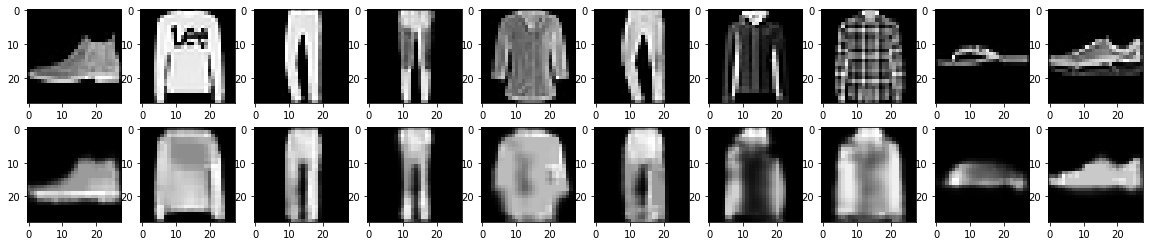

In [23]:
n=10
plt.figure(figsize=(20, 4))
for k in range(n):
    ax = plt.subplot(2, n, k+1)
    plt.imshow(x_test[k:k+1,:].reshape((28,28)))
    ax = plt.subplot(2, n, k+1 + n)
    reconstruction = autoenc.predict(x_test[k:k+1,:])
    reconstruction.resize((28,28))
    plt.imshow(reconstruction)

### 2.**Image Classification**

2.1 Deep CNN

In [69]:

from keras.utils import np_utils
from keras.layers import Dropout, Flatten

print(y_train.shape)
print(y_train[:10])


y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(y_train.shape)

(60000,)
[9 0 0 3 0 2 7 2 5 5]
(60000, 10)


In [70]:
cnn = Sequential()
cnn.add(Conv2D(filters =64 ,kernel_size=(4, 4), activation='relu', strides=(1, 1), padding='same',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(filters = 64,kernel_size=(4, 4), activation='relu', strides=(1, 1), padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))
print(cnn.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 64)        1088      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        65600     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)            

In [71]:
cnn.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
cnn.fit(x_train, y_train, epochs=4,batch_size=128,validation_split = 0.3)
y_pred = cnn.predict_classes(x_test)
score = cnn.evaluate(x_test, y_test, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/4
42000/42000 [==============================] - 80s 2ms/step - loss: 0.8053 - acc: 0.7080 - val_loss: 0.4451 - val_acc: 0.8382
Epoch 2/4
42000/42000 [==============================] - 79s 2ms/step - loss: 0.5251 - acc: 0.8126 - val_loss: 0.3777 - val_acc: 0.8621
Epoch 3/4
42000/42000 [==============================] - 79s 2ms/step - loss: 0.4458 - acc: 0.8414 - val_loss: 0.3315 - val_acc: 0.8778
Epoch 4/4
10000/10000 [==============================] - 4s 402us/step


In [77]:
score_train = cnn.evaluate(x_train, y_train, verbose=1)
print("Train Loss:", score_train[0])
print("Train Accuracy:", score_train[1])

60000/60000 [==============================] - 23s 390us/step
Train Loss: 0.281204110789299
Train Accuracy: 0.8951833333333333


In [72]:
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.3187678870201111
Test Accuracy: 0.8827


2.2 Transfer Learning

In [12]:
from keras.applications import VGG19
from keras.preprocessing.image import img_to_array, array_to_img
tsl = Sequential()
vgg = VGG19(weights="imagenet",include_top=False,input_shape=(32,32,3))
tsl.add(vgg)
tsl.add(Flatten())
tsl.add(Dense(32, activation="relu"))
tsl.add(Dropout(0.5))
tsl.add(Dense(10, activation='softmax'))
vgg.trainable = False
tsl.trainable_weights

[<tf.Variable 'dense_3/kernel:0' shape=(512, 32) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(32,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(32, 10) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(10,) dtype=float32_ref>]

In [13]:
tsl.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["acc"])
tsl.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 20,041,130
Trainable params: 16,746
Non-trainable params: 20,024,384
_________________________________________________________________


In [14]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
x_train2 = np.pad(x_train, ((0,0),(2,2),(2,2),(1,1)), mode='edge')
x_test2 = np.pad(x_test, ((0,0),(2,2),(2,2),(1,1)), mode='edge')

In [16]:
x_train2.shape

(60000, 32, 32, 3)

In [17]:
tsl.fit(x_train2, y_train, epochs=4,batch_size=128,validation_split = 0.3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 42000 samples, validate on 18000 samples
Epoch 1/4
42000/42000 [==============================] - 389s 9ms/step - loss: 1.3056 - acc: 0.5500 - val_loss: 0.7134 - val_acc: 0.7672
Epoch 2/4
42000/42000 [==============================] - 388s 9ms/step - loss: 0.9024 - acc: 0.6863 - val_loss: 0.6037 - val_acc: 0.7888
Epoch 3/4
42000/42000 [==============================] - 388s 9ms/step - loss: 0.7997 - acc: 0.7210 - val_loss: 0.5570 - val_acc: 0.8026
Epoch 4/4
42000/42000 [==============================] - 387s 9ms/step - loss: 0.7441 - acc: 0.7388 - val_loss: 0.5287 - val_acc: 0.8097


In [76]:
score_train = tsl.evaluate(x_train2, y_train, verbose=1)
print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1])

60000/60000 [==============================] - 411s 7ms/step
Train loss: 0.5216095808267593
Train accuracy: 0.8143666666666667


In [21]:
score = tsl.evaluate(x_test2, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 69s 7ms/step
Test loss: 0.5346819851875305
Test accuracy: 0.8077


## **3. Text Classification**

**3.1 RNN**

In [31]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
file_path = "/content/gdrive/My Drive/Colab Notebooks/tweets_with_labels.csv"

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
data = pd.read_csv(file_path, sep='\t', engine='python', index_col=0)

tokenizer = Tokenizer(num_words=5000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data['tweet'].values)

In [36]:
data.head()

,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
id,,,,,,,,,,,,,,,,
1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [43]:
sequences = np.array(tokenizer.texts_to_sequences(data['tweet'].values))
print(sequences.shape)
dt = pad_sequences(sequences, 64)
print(dt.shape)

(77946,)
(77946, 64)


In [45]:
labels = np.array(data[data.columns[1:]].values)
print(labels.shape)


(77946, 15)


In [0]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(dt, labels, test_size=0.2, random_state=9000)

In [48]:
x_train3.shape,x_test3.shape

((62356, 64), (15590, 64))

In [40]:
lstm = Sequential()
lstm.add(Embedding(5000, 32))
lstm.add(LSTM(32))
lstm.add(Dense(15, activation ='sigmoid'))
lstm.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
lstm.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 15)                495       
Total params: 168,815
Trainable params: 168,815
Non-trainable params: 0
_________________________________________________________________


In [49]:
lstm_fit = lstm.fit(x_train3, y_train3, epochs=15, batch_size=256, validation_data=(x_test3, y_test3))

Train on 62356 samples, validate on 15590 samples
Epoch 1/15
62356/62356 [==============================] - 17s 272us/step - loss: 0.2650 - acc: 0.8677 - val_loss: 0.2197 - val_acc: 0.8743
Epoch 2/15
62356/62356 [==============================] - 17s 266us/step - loss: 0.1945 - acc: 0.8797 - val_loss: 0.1728 - val_acc: 0.8876
Epoch 3/15
62356/62356 [==============================] - 16s 257us/step - loss: 0.1561 - acc: 0.8947 - val_loss: 0.1430 - val_acc: 0.9002
Epoch 4/15
62356/62356 [==============================] - 16s 260us/step - loss: 0.1315 - acc: 0.9044 - val_loss: 0.1238 - val_acc: 0.9058
Epoch 5/15
62356/62356 [==============================] - 16s 263us/step - loss: 0.1173 - acc: 0.9079 - val_loss: 0.1151 - val_acc: 0.9082
Epoch 6/15
62356/62356 [==============================] - 16s 262us/step - loss: 0.1091 - acc: 0.9110 - val_loss: 0.1092 - val_acc: 0.9105
Epoch 7/15
62356/62356 [==============================] - 16s 259us/step - loss: 0.1036 - acc: 0.9123 - val_loss: 0.

In [50]:
score_lstm = lstm.evaluate(x_test3, y_test3)

15590/15590 [==============================] - 3s 199us/step


In [73]:
print('Test loss:', score_lstm[0])
print('Test accuracy:', score_lstm[1])

Test loss: 0.0985502520008604
Test accuracy: 0.9124823686096284


3.2 CNN

In [54]:
cnn_model = Sequential()
cnn_model.add(Embedding(5000,64))
cnn_model.add(Conv1D(64, kernel_size = 3,padding='valid',activation='relu',strides=1))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(64,activation='relu'))
cnn_model.add(Dense(15,activation='softmax'))
cnn_model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['acc'])
cnn_history = cnn_model.fit(x_train3,y_train3,epochs = 10,validation_data = (x_test3, y_test3), batch_size = 64,verbose=1)

Train on 62356 samples, validate on 15590 samples
Epoch 1/10
62356/62356 [==============================] - 13s 204us/step - loss: 1.6222 - acc: 0.7158 - val_loss: 1.1764 - val_acc: 0.8210
Epoch 2/10
62356/62356 [==============================] - 12s 188us/step - loss: 1.2443 - acc: 0.8081 - val_loss: 1.1247 - val_acc: 0.8273
Epoch 3/10
62356/62356 [==============================] - 12s 186us/step - loss: 1.1772 - acc: 0.8158 - val_loss: 1.1047 - val_acc: 0.8225
Epoch 4/10
62356/62356 [==============================] - 12s 186us/step - loss: 1.1350 - acc: 0.8199 - val_loss: 1.0923 - val_acc: 0.8251
Epoch 5/10
62356/62356 [==============================] - 12s 188us/step - loss: 1.1117 - acc: 0.8210 - val_loss: 1.0896 - val_acc: 0.8239
Epoch 6/10
62356/62356 [==============================] - 12s 188us/step - loss: 1.0931 - acc: 0.8257 - val_loss: 1.0878 - val_acc: 0.8272
Epoch 7/10
62356/62356 [==============================] - 12s 196us/step - loss: 1.0788 - acc: 0.8282 - val_loss: 1.

In [55]:
score_cnn = cnn_model.evaluate(x_test3, y_test3)

15590/15590 [==============================] - 1s 56us/step


In [74]:
print('Test loss:', score_cnn[0])
print('Test accuracy:', score_cnn[1])

Test loss: 1.0841872173444516
Test accuracy: 0.826298909549762


3.3 Compare models

In [0]:
from sklearn.metrics import roc_curve, roc_auc_score

In [0]:

res_lstm = lstm.predict(x_test3)
res = cnn_model.predict(x_test3)

In [0]:
y_test3 = np.where(y_test3 > 0, 1, 0)

In [0]:

f_lstm, t_lstm, _ = roc_curve(y_test3.ravel(), res_lstm.ravel())
f_cnn, t_cnn, _ = roc_curve(y_test3.ravel(), res.ravel())

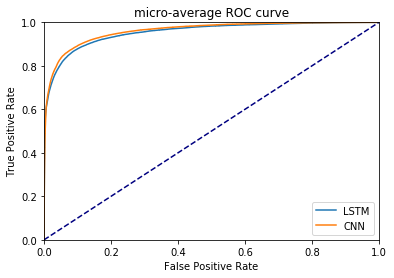

In [61]:
plt.figure()
plt.plot(f_lstm, t_lstm, label='LSTM')
plt.plot(f_cnn, t_cnn, label='CNN')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('micro-average ROC curve')
plt.legend(loc="lower right")
plt.show()